<a href="https://colab.research.google.com/github/DallanQ/notebooks/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a  demo notebook to show off using Pandas, Matplotlib, and Huggingface for data science tasks

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install transformers

In [2]:
import pandas as pd

# Load the dataset from a CSV file
url = "https://huggingface.co/datasets/julien-c/titanic-survival/resolve/main/titanic.csv"
df = pd.read_csv(url)
print(len(df))
print(df.head())


887
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


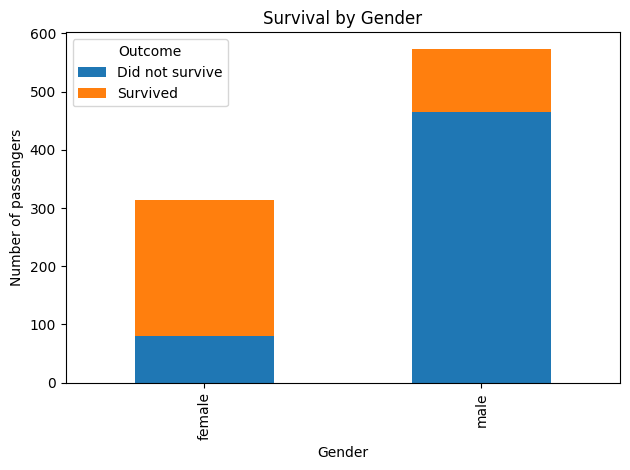

In [4]:
import matplotlib.pyplot as plt

# drop rows with empty Sex or Survived column values
cleaned_df = df.dropna(subset=["Sex", "Survived"])

# group by Sex and count the number in each group
counts = cleaned_df.groupby(["Sex", "Survived"]).size().unstack()

# plot
counts.plot(kind="bar", stacked=True)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of passengers")
plt.legend(["Did not survive", "Survived"], title="Outcome")
plt.tight_layout()
plt.show()

In [9]:
import getpass
import os

os.environ["HF_TOKEN"] = getpass.getpass("Enter your HF token")

Enter your HF token··········


In [12]:
from transformers import pipeline

summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

text = """
The Titanic was a massive British passenger liner hailed as the largest and most
luxurious ship of its time. On April 10, 1912, it set sail on its maiden voyage
from Southampton, England, to New York City, carrying over 2,200 passengers and
 crew. Designed with advanced safety features and deemed "unsinkable," the
 Titanic struck an iceberg in the North Atlantic just four days into the journey.
 The collision caused the ship’s hull to rupture, and within hours, it sank into
 the freezing ocean waters. Over 1,500 lives were lost due to insufficient
 lifeboats and chaotic evacuation efforts, making it one of the deadliest maritime
 disasters in history.


"""

summary = summarizer(text, max_length=50, min_length=3, do_sample=False)[0]["summary_text"]

print(summary)

Device set to use cpu


 The Titanic was a massive British passenger liner hailed as the largest and most luxurious ship of its time . On April 10, 1912, it set sail on its maiden voyage from Southampton, England, to New York City,
